In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['Arial']

In [ ]:
radical = pd.read_csv("C:/Users/Haitong/UKESM1-0-LL_2010_2014_0.5deg.csv")

In [3]:
radical

,longitude,latitude,t,loc,o3,o3prod,o3loss,eminox,emivoc,tas,...,hno3,co,hcho,ch4,c2h6,c3h8,isop,ch3o2_mod,ho2_mod,o1d_mod
0,0.25,-89.75,1.0,160.25,1.452797e-08,7.867945e-14,9.046455e-14,0.000000e+00,0.000000e+00,248.22893,...,3.843821e-12,4.124111e-08,1.957105e-11,0.000002,1.073096e-09,3.005076e-11,1.449166e-26,2.699120e-12,4.214414e-12,3.569033e-22
1,0.75,-89.75,1.0,660.25,1.452924e-08,7.864571e-14,9.042632e-14,0.000000e+00,0.000000e+00,248.23410,...,3.840549e-12,4.124122e-08,1.956535e-11,0.000002,1.073094e-09,3.004989e-11,1.423354e-26,2.699614e-12,4.214263e-12,3.567889e-22
2,1.25,-89.75,1.0,1160.25,1.453387e-08,7.866169e-14,9.045681e-14,0.000000e+00,0.000000e+00,248.24300,...,3.845680e-12,4.124133e-08,1.957391e-11,0.000002,1.073095e-09,3.004895e-11,1.407152e-26,2.700414e-12,4.214875e-12,3.568066e-22
3,1.75,-89.75,1.0,1660.25,1.454053e-08,7.870749e-14,9.052852e-14,0.000000e+00,0.000000e+00,248.25412,...,3.855855e-12,4.124143e-08,1.959102e-11,0.000002,1.073097e-09,3.004796e-11,1.396716e-26,2.701396e-12,4.215945e-12,3.569035e-22
4,2.25,-89.75,1.0,2160.25,1.454718e-08,7.875331e-14,9.060023e-14,0.000000e+00,0.000000e+00,248.26526,...,3.866029e-12,4.124154e-08,1.960813e-11,0.000002,1.073100e-09,3.004697e-11,1.386279e-26,2.702378e-12,4.217016e-12,3.570005e-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3110395,-2.25,89.75,12.0,357839.75,1.621541e-08,3.649463e-16,1.918938e-16,1.239357e-13,2.444437e-15,242.58208,...,1.885407e-10,8.999778e-08,1.391217e-11,0.000002,2.369334e-09,3.742865e-10,6.178701e-15,5.593346e-14,5.392361e-15,0.000000e+00
3110396,-1.75,89.75,12.0,358339.75,1.621581e-08,3.846478e-16,1.967400e-16,1.921138e-13,3.788097e-15,242.57927,...,1.885361e-10,8.999797e-08,1.391608e-11,0.000002,2.369363e-09,3.743148e-10,6.177331e-15,5.625231e-14,5.410102e-15,0.000000e+00
3110397,-1.25,89.75,12.0,358839.75,1.621621e-08,4.043494e-16,2.015861e-16,2.602919e-13,5.131757e-15,242.57646,...,1.885316e-10,8.999815e-08,1.391999e-11,0.000002,2.369391e-09,3.743430e-10,6.175962e-15,5.657117e-14,5.427844e-15,0.000000e+00
3110398,-0.75,89.75,12.0,359339.75,1.621423e-08,4.359465e-16,2.069088e-16,3.736637e-13,7.366097e-15,242.57349,...,1.885160e-10,8.999830e-08,1.391732e-11,0.000002,2.369430e-09,3.743790e-10,6.174583e-15,5.640556e-14,5.470570e-15,0.000000e+00


In [4]:
radical['month'] = radical['t']%12

In [5]:
radical['oh_mole'] = radical['oh']*6.022*10**17/8.314/radical['tas']*radical['ps']
radical['ch3o2_mole'] = radical['ch3o2_mod']*6.022*10**17/8.314/radical['tas']*radical['ps']
radical['ho2_mole'] = radical['ho2_mod']*6.022*10**17/8.314/radical['tas']*radical['ps']
radical['o1d_mole'] = radical['o1d_mod']*6.022*10**17/8.314/radical['tas']*radical['ps']

In [6]:
radical_JJA = radical[radical['month']>5][radical['month']>9]
radical_DJF = radical[radical['month']<3]

In [7]:
radical_JJA_map = radical_JJA.groupby('loc').mean()
radical_DJF_map = radical_DJF.groupby('loc').mean()

In [8]:
radical_JJA_map.to_csv('Extended Data Fig. 4 radical-JJA-mapping.csv', index = False)
radical_DJF_map.to_csv('Extended Data Fig. 4 radical-DJF-mapping.csv', index = False)

### Here map the radicals in a simplified way

(-90.0, 90.0)

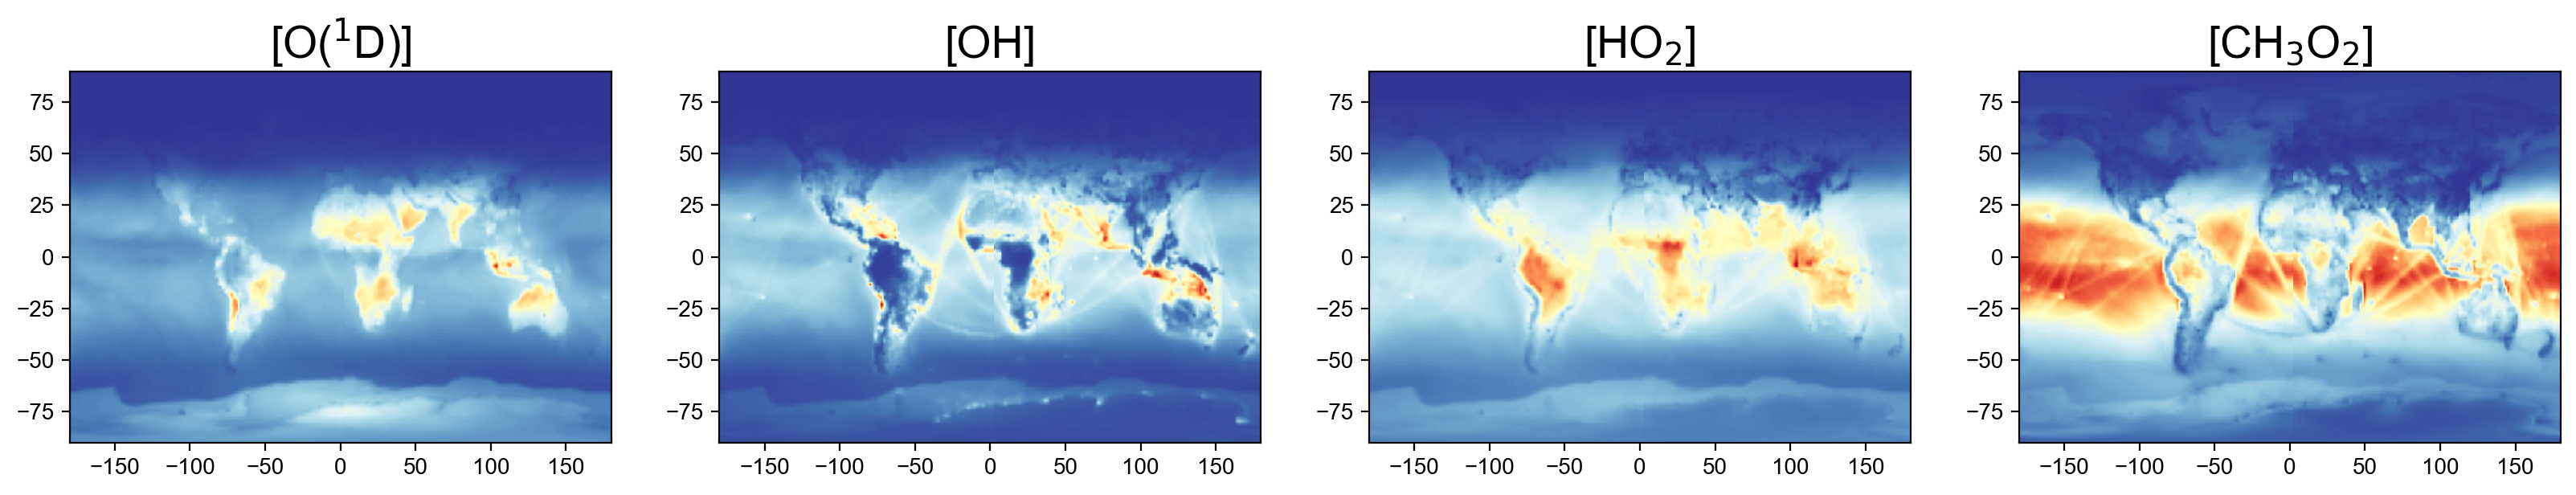

In [12]:
plt.figure(num=None, figsize=(20, 3), dpi=200, facecolor='w', edgecolor='k')
temp = radical_JJA_map
x = temp['longitude']
y = temp['latitude']
cm = plt.cm.get_cmap('RdYlBu_r')

plt.subplot(1,4,1)
plt.title('[O(${^1}$D)]', fontsize = 20, fontname = "Arial", color = "black")
z = (temp['o1d_mole'])*10**3
sc = plt.scatter(x, y, c=z, marker="s", s=5, cmap=cm)
plt.xlim([-180, 180])
plt.ylim([-90, 90])
#plt.colorbar(fraction=0.02)

plt.subplot(1,4,2)
plt.title('[OH]', fontsize = 20, fontname = "Arial", color = "black")
z = (temp['oh_mole'])*10**(-6)
sc = plt.scatter(x, y, c=z, marker="s", s=5, cmap=cm)
plt.xlim([-180, 180])
plt.ylim([-90, 90])
#plt.colorbar(fraction=0.02)

plt.subplot(1,4,3)
plt.title('[HO${_2}$]', fontsize = 20, fontname = "Arial", color = "black")
z = (temp['ho2_mole'])*10**(-8)
sc = plt.scatter(x, y, c=z, marker="s", s=5, cmap=cm)
plt.xlim([-180, 180])
plt.ylim([-90, 90])
#plt.colorbar(fraction=0.02)

plt.subplot(1,4,4)
plt.title('[CH${_3}$O${_2}$]', fontsize = 20, fontname = "Arial", color = "black")
z = (temp['ch3o2_mole'])*10**(-8)
sc = plt.scatter(x, y, c=z, marker="s", s=5, cmap=cm)
plt.xlim([-180, 180])
plt.ylim([-90, 90])
#plt.colorbar(fraction=0.02)

(-90.0, 90.0)

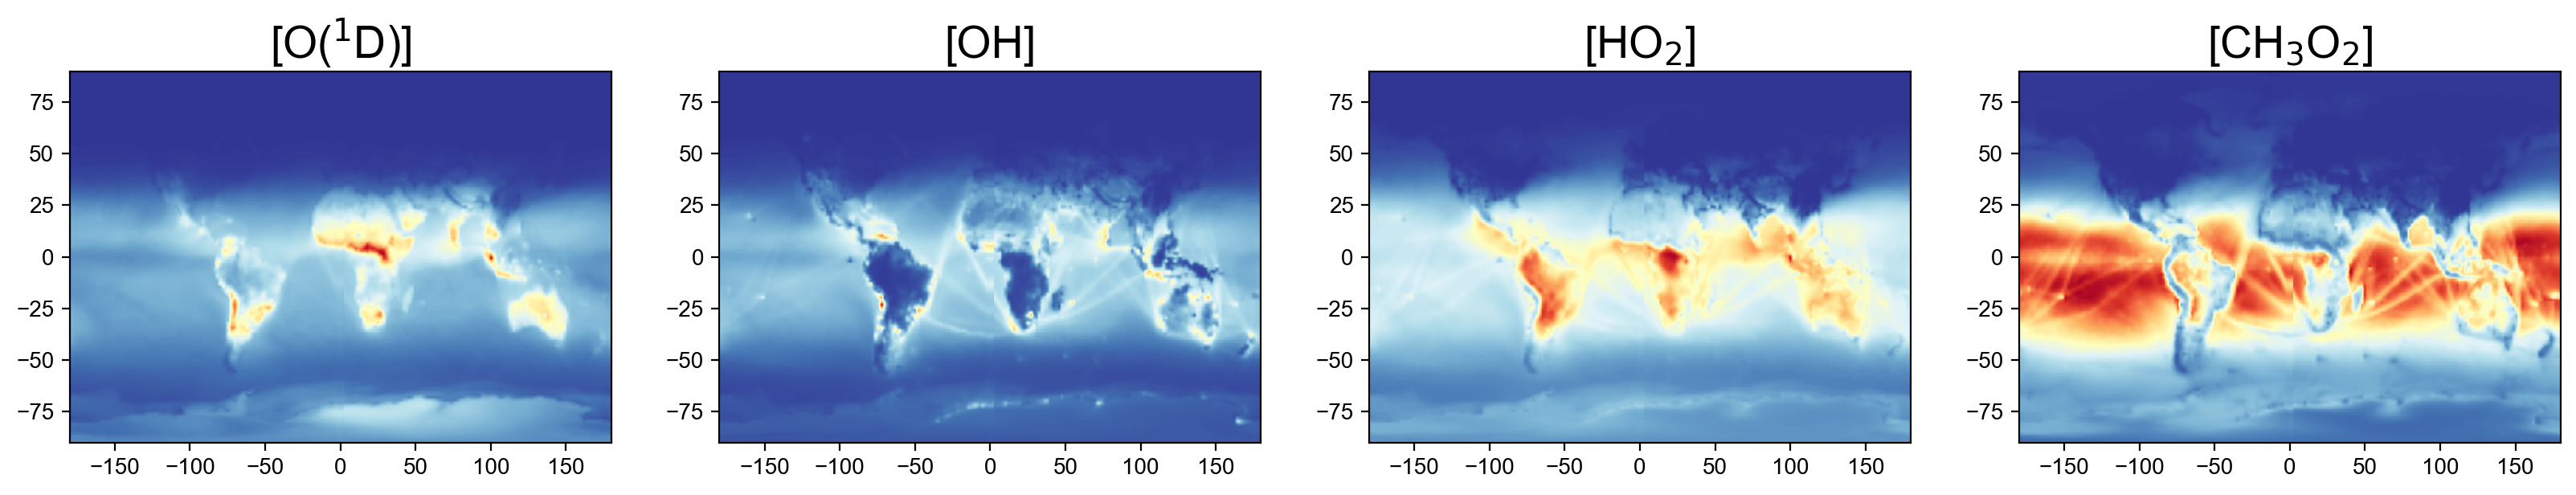

In [13]:
plt.figure(num=None, figsize=(20, 3), dpi=200, facecolor='w', edgecolor='k')
temp = radical_DJF_map
x = temp['longitude']
y = temp['latitude']
cm = plt.cm.get_cmap('RdYlBu_r')

plt.subplot(1,4,1)
plt.title('[O(${^1}$D)]', fontsize = 20, fontname = "Arial", color = "black")
z = (temp['o1d_mole'])*10**3
sc = plt.scatter(x, y, c=z, marker="s", s=5, cmap=cm)
plt.xlim([-180, 180])
plt.ylim([-90, 90])
#plt.colorbar(fraction=0.02)

plt.subplot(1,4,2)
plt.title('[OH]', fontsize = 20, fontname = "Arial", color = "black")
z = (temp['oh_mole'])*10**(-6)
sc = plt.scatter(x, y, c=z, marker="s", s=5, cmap=cm)
plt.xlim([-180, 180])
plt.ylim([-90, 90])
#plt.colorbar(fraction=0.02)

plt.subplot(1,4,3)
plt.title('[HO${_2}$]', fontsize = 20, fontname = "Arial", color = "black")
z = (temp['ho2_mole'])*10**(-8)
sc = plt.scatter(x, y, c=z, marker="s", s=5, cmap=cm)
plt.xlim([-180, 180])
plt.ylim([-90, 90])
#plt.colorbar(fraction=0.02)

plt.subplot(1,4,4)
plt.title('[CH${_3}$O${_2}$]', fontsize = 20, fontname = "Arial", color = "black")
z = (temp['ch3o2_mole'])*10**(-8)
sc = plt.scatter(x, y, c=z, marker="s", s=5, cmap=cm)
plt.xlim([-180, 180])
plt.ylim([-90, 90])
#plt.colorbar(fraction=0.02)